In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_excel("sales.xlsx")

In [3]:
dataset.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [5]:
dataset["Order year"]=dataset['Order Date'].dt.year

In [6]:
dataset.shape

(9426, 25)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [8]:
dataset.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
Order year               0
dtype: int64

In [9]:
# impute missing values

In [10]:
dataset['Product Base Margin'] = dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean())

In [11]:
dataset.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
Order year              0
dtype: int64

In [12]:
#Uppercase All the categorical values

In [13]:
categorical_columns = [
    'Order Priority', 'Customer Name', 'Ship Mode', 'Customer Segment',
    'Product Category', 'Product Sub-Category', 'Product Container', 
    'Product Name', 'Region', 'State or Province', 'City'
]

# Convert specified categorical columns to uppercase
dataset[categorical_columns] = dataset[categorical_columns].applymap(str.upper)
print(dataset.head())

   Row ID Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0   18606  NOT SPECIFIED      0.01        2.88           0.50            2   
1   20847           HIGH      0.01        2.84           0.93            3   
2   23086  NOT SPECIFIED      0.03        6.68           6.15            3   
3   23087  NOT SPECIFIED      0.01        5.68           3.60            3   
4   23088  NOT SPECIFIED      0.00      205.99           2.50            3   

     Customer Name    Ship Mode Customer Segment Product Category  ...  \
0  JANICE FLETCHER  REGULAR AIR        CORPORATE  OFFICE SUPPLIES  ...   
1    BONNIE POTTER  EXPRESS AIR        CORPORATE  OFFICE SUPPLIES  ...   
2    BONNIE POTTER  EXPRESS AIR        CORPORATE  OFFICE SUPPLIES  ...   
3    BONNIE POTTER  REGULAR AIR        CORPORATE  OFFICE SUPPLIES  ...   
4    BONNIE POTTER  EXPRESS AIR        CORPORATE       TECHNOLOGY  ...   

  State or Province       City Postal Code  Order Date  Ship Date    Profit  \
0      

In [14]:
#Check the Categoral unique values.

In [15]:
dataset['Order Priority'].unique()

array(['NOT SPECIFIED', 'HIGH', 'MEDIUM', 'LOW', 'CRITICAL', 'CRITICAL '],
      dtype=object)

In [16]:
dataset['Order Priority'] = dataset['Order Priority'].str.strip().str.upper()

In [17]:
dataset['Order Priority'].value_counts()

HIGH             1970
LOW              1926
NOT SPECIFIED    1881
MEDIUM           1844
CRITICAL         1805
Name: Order Priority, dtype: int64

In [18]:
dataset['Ship Mode'].unique()

array(['REGULAR AIR', 'EXPRESS AIR', 'DELIVERY TRUCK'], dtype=object)

In [19]:
dataset['Customer Segment'].unique()

array(['CORPORATE', 'HOME OFFICE', 'SMALL BUSINESS', 'CONSUMER'],
      dtype=object)

In [20]:
dataset['Product Category'].unique()

array(['OFFICE SUPPLIES', 'TECHNOLOGY', 'FURNITURE'], dtype=object)

In [21]:
dataset['Product Sub-Category'].unique()

array(['LABELS', 'PENS & ART SUPPLIES', 'PAPER',
       'SCISSORS, RULERS AND TRIMMERS', 'TELEPHONES AND COMMUNICATION',
       'OFFICE MACHINES', 'CHAIRS & CHAIRMATS', 'APPLIANCES', 'BOOKCASES',
       'TABLES', 'ENVELOPES', 'OFFICE FURNISHINGS', 'RUBBER BANDS',
       'BINDERS AND BINDER ACCESSORIES', 'STORAGE & ORGANIZATION',
       'COMPUTER PERIPHERALS', 'COPIERS AND FAX'], dtype=object)

In [22]:
dataset['Product Container'].unique()

array(['SMALL BOX', 'WRAP BAG', 'SMALL PACK', 'JUMBO DRUM', 'JUMBO BOX',
       'MEDIUM BOX', 'LARGE BOX'], dtype=object)

In [23]:
dataset['Product Name'].unique()

array(['AVERY 49', 'SANFORD LIQUID ACCENT™ TANK-STYLE HIGHLIGHTERS',
       'XEROX 1968', ..., 'DAX WOOD DOCUMENT FRAME', 'R289LX',
       'ALLIANCE RUBBER BANDS'], dtype=object)

In [24]:
dataset['Region'].unique()

array(['CENTRAL', 'WEST', 'EAST', 'SOUTH'], dtype=object)

In [25]:
dataset['State or Province'].unique()

array(['ILLINOIS', 'WASHINGTON', 'CALIFORNIA', 'MASSACHUSETTS',
       'NEW HAMPSHIRE', 'NEW JERSEY', 'RHODE ISLAND', 'MINNESOTA',
       'NEW YORK', 'MONTANA', 'NEBRASKA', 'OREGON', 'TEXAS', 'VIRGINIA',
       'VERMONT', 'MAINE', 'OHIO', 'LOUISIANA', 'KANSAS', 'CONNECTICUT',
       'UTAH', 'PENNSYLVANIA', 'TENNESSEE', 'COLORADO', 'MICHIGAN',
       'ARIZONA', 'OKLAHOMA', 'MISSOURI', 'NORTH CAROLINA', 'IOWA',
       'FLORIDA', 'NEW MEXICO', 'GEORGIA', 'MARYLAND', 'NEVADA',
       'MISSISSIPPI', 'INDIANA', 'KENTUCKY', 'WEST VIRGINIA', 'ARKANSAS',
       'SOUTH CAROLINA', 'DISTRICT OF COLUMBIA', 'IDAHO', 'DELAWARE',
       'ALABAMA', 'WYOMING', 'WISCONSIN', 'SOUTH DAKOTA', 'NORTH DAKOTA'],
      dtype=object)

In [26]:
dataset['City'].unique()

array(['ADDISON', 'ANACORTES', 'SAN GABRIEL', ..., 'DARIEN',
       'CRYSTAL LAKE', 'FAIRMONT'], dtype=object)

# EDA

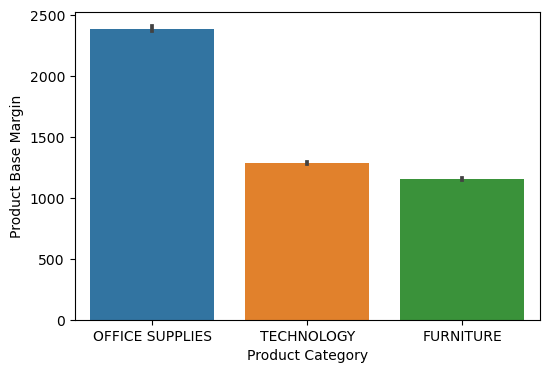

In [44]:
plt.figure(figsize=(6,4))
sns.barplot(x="Product Category",y="Product Base Margin",data=dataset,estimator=np.sum)
plt.show()

# State or Province

In [29]:
dataset["State or Province"].value_counts()[:5]

CALIFORNIA    1021
TEXAS          646
ILLINOIS       584
NEW YORK       574
FLORIDA        522
Name: State or Province, dtype: int64

# Profit

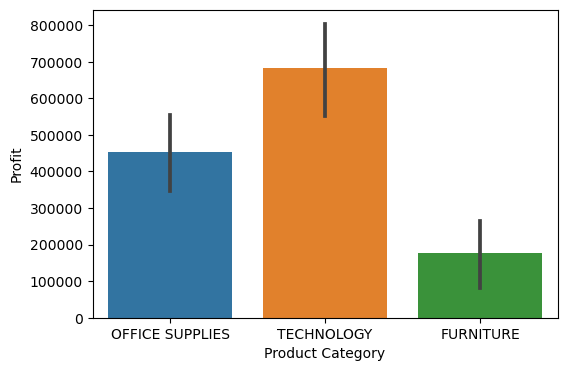

In [30]:
plt.figure(figsize=(6,4))
sns.barplot(x="Product Category",y="Profit",data=dataset,estimator=np.sum)
plt.show()

# Order Year

In [31]:
dataset["Order year"].value_counts()

2013    3054
2012    2241
2011    2179
2010    1952
Name: Order year, dtype: int64

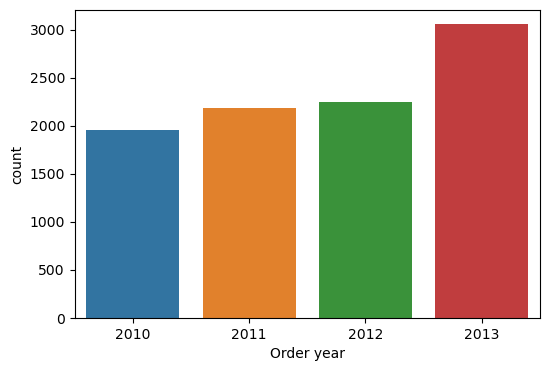

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(x="Order year",data=dataset)
plt.show()

# Product Category

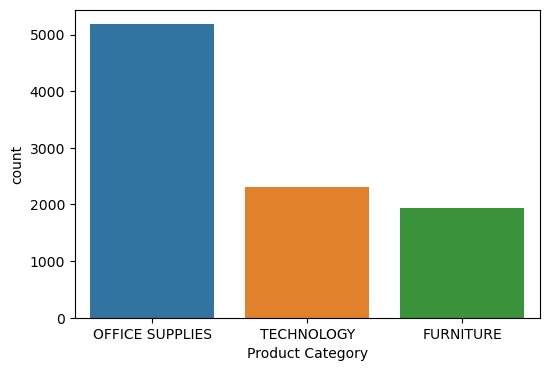

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(x="Product Category",data=dataset)
plt.show()

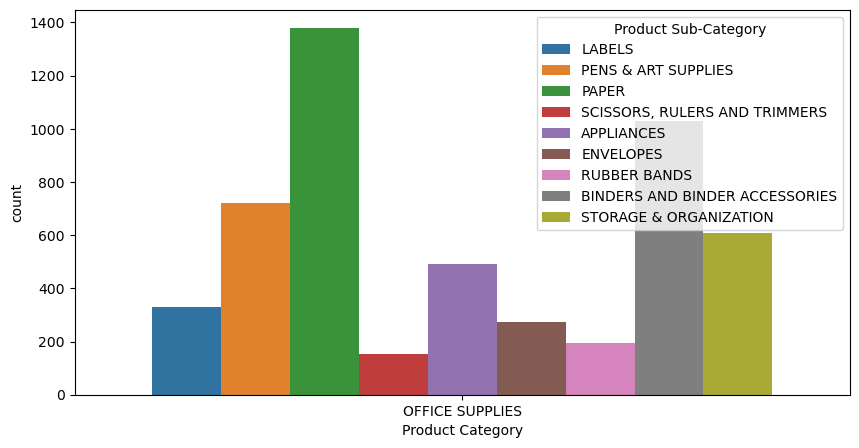

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(x="Product Category",data=dataset[dataset["Product Category"]=="OFFICE SUPPLIES"],hue="Product Sub-Category")
plt.show()

# Customer Segment

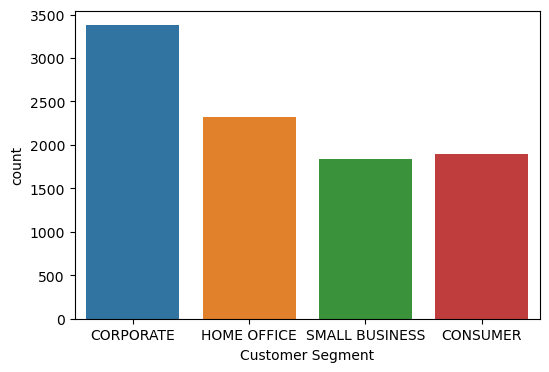

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(x="Customer Segment",data=dataset)
plt.show()

# Ship Mode

In [36]:
dataset['Ship Mode'].value_counts()

REGULAR AIR       7036
DELIVERY TRUCK    1283
EXPRESS AIR       1107
Name: Ship Mode, dtype: int64

In [37]:
x=dataset['Ship Mode'].value_counts().index
y=dataset['Ship Mode'].value_counts().values

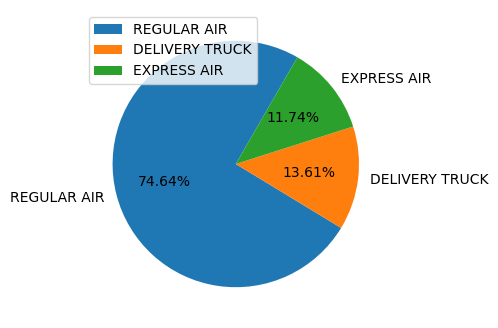

In [38]:
plt.figure(figsize=(5,4))
plt.pie(y,labels=x,startangle = 60,autopct="%0.2f%%")
plt.legend(loc=2)
plt.show()

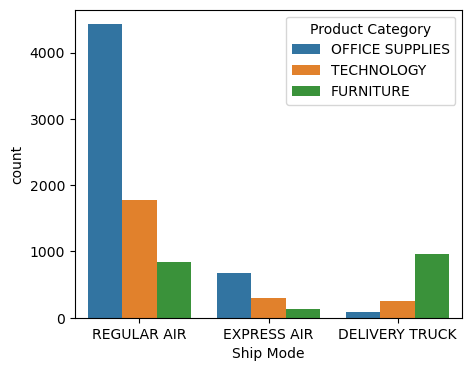

In [39]:
plt.figure(figsize=(5,4))
sns.countplot(x="Ship Mode",data=dataset,hue="Product Category")
plt.show()

# Order Priority

In [40]:
dataset['Order Priority'].value_counts()

HIGH             1970
LOW              1926
NOT SPECIFIED    1881
MEDIUM           1844
CRITICAL         1805
Name: Order Priority, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

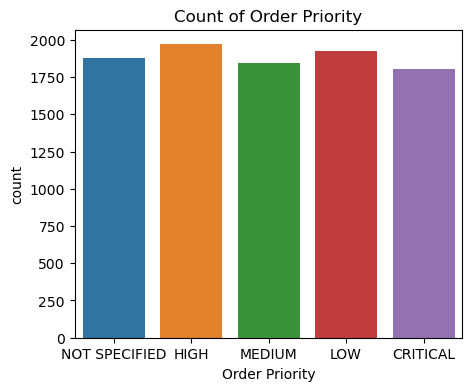

In [41]:
plt.figure(figsize=(5,4))
sns.countplot(x="Order Priority",data=dataset)
plt.title("Count of Order Priority")
plt.show

# TSA 

In [43]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
data = pd.read_excel('sales.xlsx')

# Convert 'Order Date' to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Set 'Order Date' as the index
data.set_index('Order Date', inplace=True)

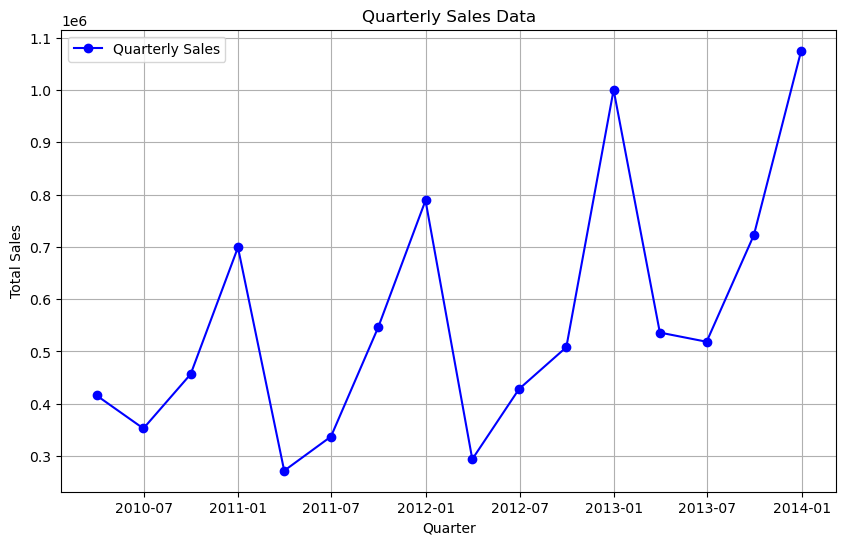

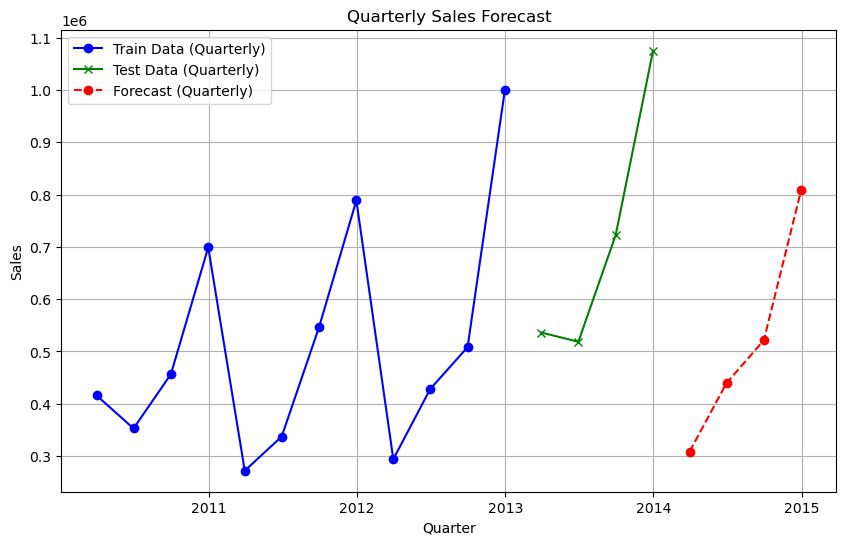

In [146]:
# Resample data by quarter and sum the sales for each quarter
quarterly_sales = data['Sales'].resample('Q').sum()

plt.figure(figsize=(10, 6))
plt.plot(quarterly_sales, label='Quarterly Sales', color='blue', marker='o')
plt.title('Quarterly Sales Data')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.legend()
plt.grid()
plt.show()

# Train-test split for quarterly data
train_quarterly = quarterly_sales[:-4] 
test_quarterly = quarterly_sales[-4:]  

# Apply Exponential Smoothing for quarterly sales
model_quarterly = ExponentialSmoothing(train_quarterly, trend='add', seasonal='add', seasonal_periods=4).fit()

# Forecast the next 4 quarters of sales
forecast_quarterly = model_quarterly.forecast(4)

# Prepare index for forecast to match the test data
forecast_quarterly.index = pd.date_range(start=test_quarterly.index[-1] + pd.DateOffset(months=3), periods=4, freq='Q')

# Plot the quarterly forecast
plt.figure(figsize=(10, 6))
plt.plot(train_quarterly.index, train_quarterly, label='Train Data (Quarterly)', color='blue', marker='o')
plt.plot(test_quarterly.index, test_quarterly, label='Test Data (Quarterly)', color='green', marker='x')
plt.plot(forecast_quarterly.index, forecast_quarterly, label='Forecast (Quarterly)', color='red', linestyle='--', marker='o')
plt.title('Quarterly Sales Forecast')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

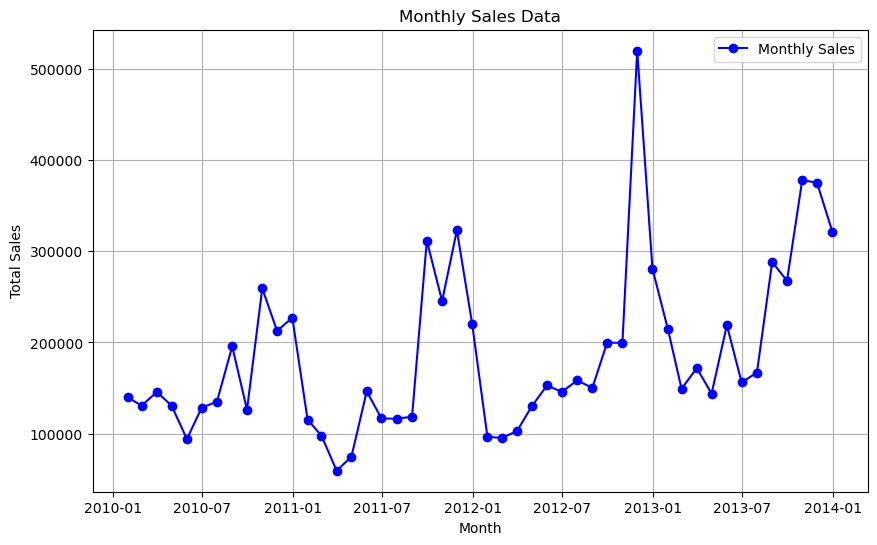

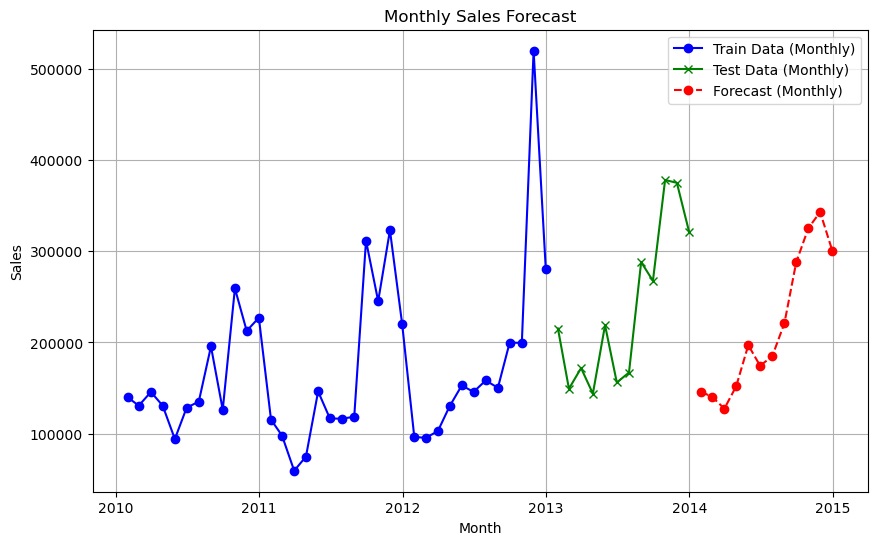

In [144]:
# Resample data by month and sum the sales for each month
monthly_sales = data['Sales'].resample('M').sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales, label='Monthly Sales', color='blue', marker='o')
plt.title('Monthly Sales Data')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.grid()
plt.show()

# Train-test split for monthly data
train_monthly = monthly_sales[:-12]  
test_monthly = monthly_sales[-12:]    
# Apply Exponential Smoothing for monthly sales
model_monthly = ExponentialSmoothing(train_monthly, trend='add', seasonal='add', seasonal_periods=12).fit()

# Forecast the next 12 months of sales
forecast_monthly = model_monthly.forecast(12)

# Prepare index for forecast to match the test data
forecast_monthly.index = pd.date_range(start=test_monthly.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')

# Plot the monthly forecast
plt.figure(figsize=(10, 6))
plt.plot(train_monthly.index, train_monthly, label='Train Data (Monthly)', color='blue', marker='o')
plt.plot(test_monthly.index, test_monthly, label='Test Data (Monthly)', color='green', marker='x')
plt.plot(forecast_monthly.index, forecast_monthly, label='Forecast (Monthly)', color='red', linestyle='--', marker='o')
plt.title('Monthly Sales Forecast')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

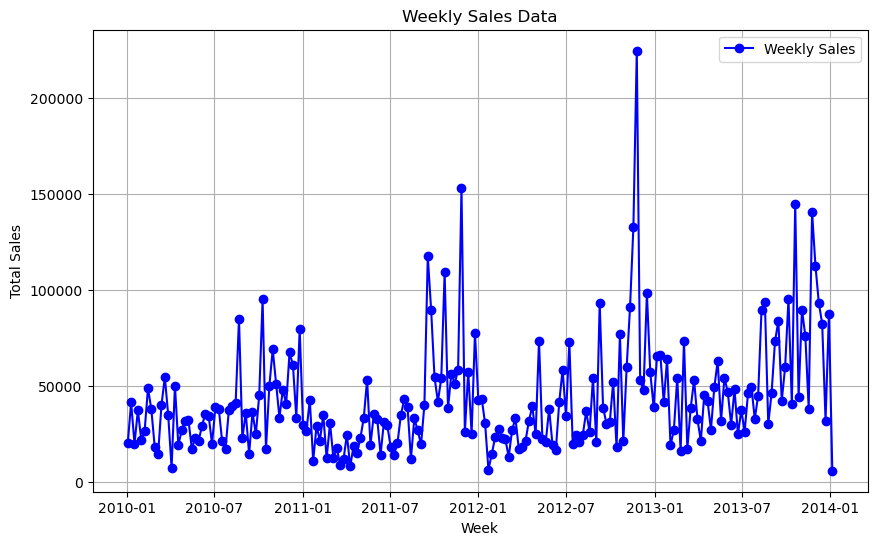

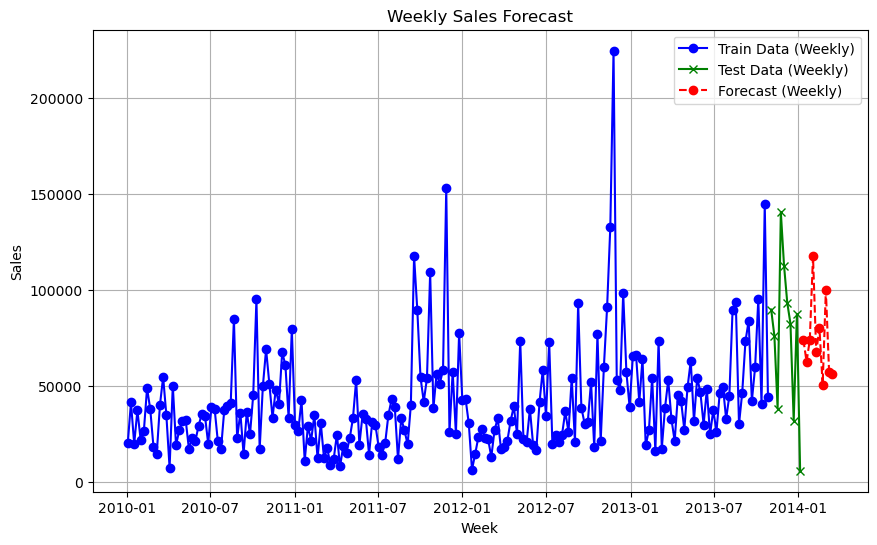

In [142]:
# Resample data by week and sum the sales for each week
weekly_sales = data['Sales'].resample('W').sum()

plt.figure(figsize=(10, 6))
plt.plot(weekly_sales, label='Weekly Sales', color='blue', marker='o')
plt.title('Weekly Sales Data')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.legend()
plt.grid()
plt.show()

# Train-test split for weekly data
train_weekly = weekly_sales[:-10]  
test_weekly = weekly_sales[-10:]   

# Apply Exponential Smoothing for weekly sales
model_weekly = ExponentialSmoothing(train_weekly, trend='add', seasonal='add', seasonal_periods=52).fit()

# Forecast the next 10 weeks of sales
forecast_weekly = model_weekly.forecast(10)

# Prepare index for forecast to match the test data
forecast_weekly.index = pd.date_range(start=test_weekly.index[-1] + pd.DateOffset(weeks=1), periods=10, freq='W')

# Plot the weekly forecast
plt.figure(figsize=(10, 6))
plt.plot(train_weekly.index, train_weekly, label='Train Data (Weekly)', color='blue', marker='o')
plt.plot(test_weekly.index, test_weekly, label='Test Data (Weekly)', color='green', marker='x')
plt.plot(forecast_weekly.index, forecast_weekly, label='Forecast (Weekly)', color='red', linestyle='--', marker='o')
plt.title('Weekly Sales Forecast')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()